# Importing Libraraies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.m vccodel_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Loading the Dataset

In [4]:
df = pd.read_csv('C:/Users/USER/Desktop/employee_promotion.csv')

In [5]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [7]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


# EDA

# Working Domain

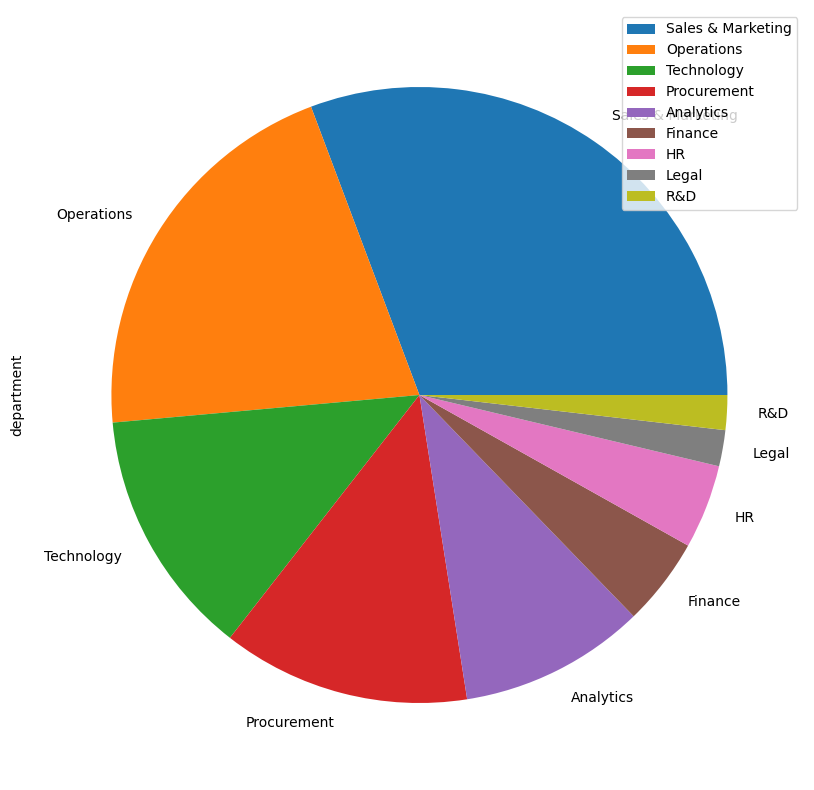

In [8]:
plt.figure(figsize=(10,10))
df['department'].value_counts().plot(kind='pie').legend()
plt.show()

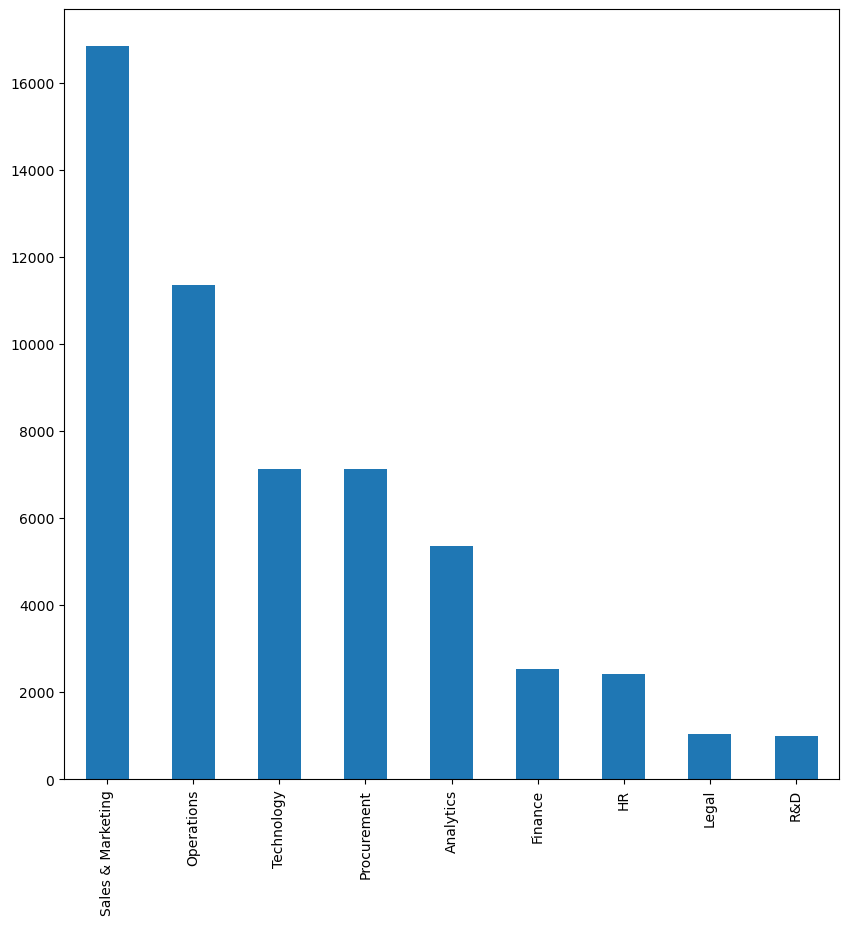

In [9]:
plt.figure(figsize=(10,10))
df['department'].value_counts().plot(kind='bar')
plt.show()

# More Number of people are working in sales & Marketing.

# Region Distribution

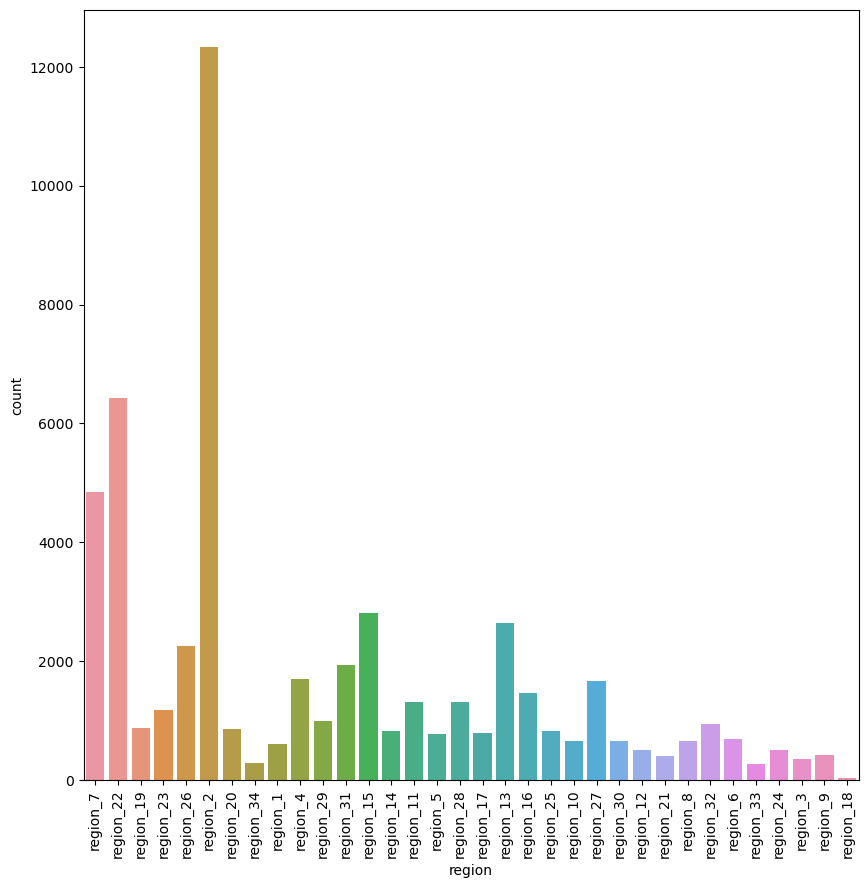

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='region')
plt.xticks(rotation=90)
plt.show()

# From the Region_2, most number of peo

# Gender distribution

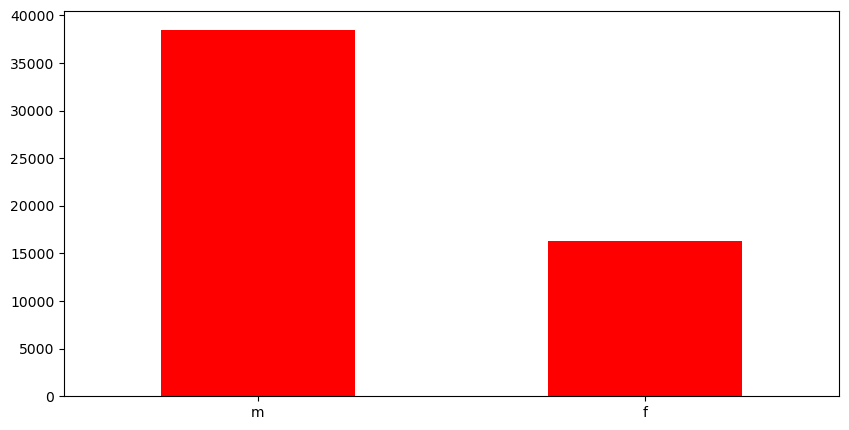

In [11]:
plt.figure(figsize=(10,5))
df['gender'].value_counts().plot(kind='bar',color='red')
plt.xticks(rotation=0)
plt.show()

# The Barplot shows that the number of Male employees are greater than the number of female employees

# Recruitment Channel

<AxesSubplot:>

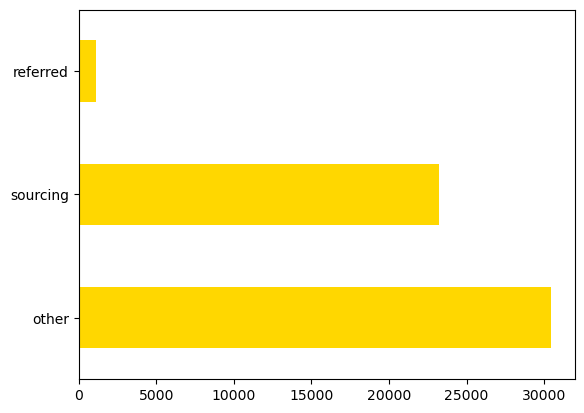

In [12]:
df['recruitment_channel'].value_counts().plot(kind='barh',color='gold')

# Employee's Education Distribution

<AxesSubplot:>

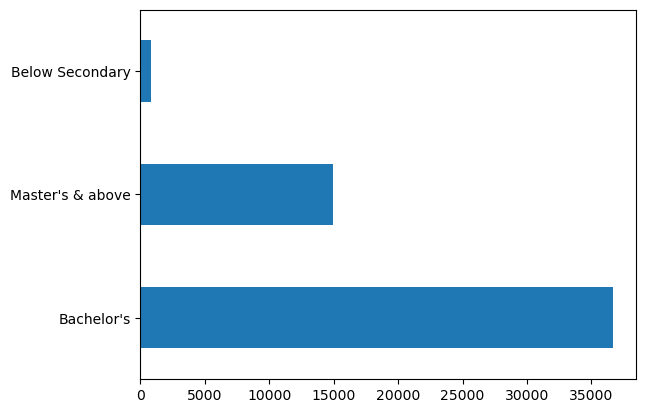

In [13]:
df['education'].value_counts().plot(kind='barh')

# The largest number of employee's highest qualification is Bachelor's Degree

# Employee's Age Distribution

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


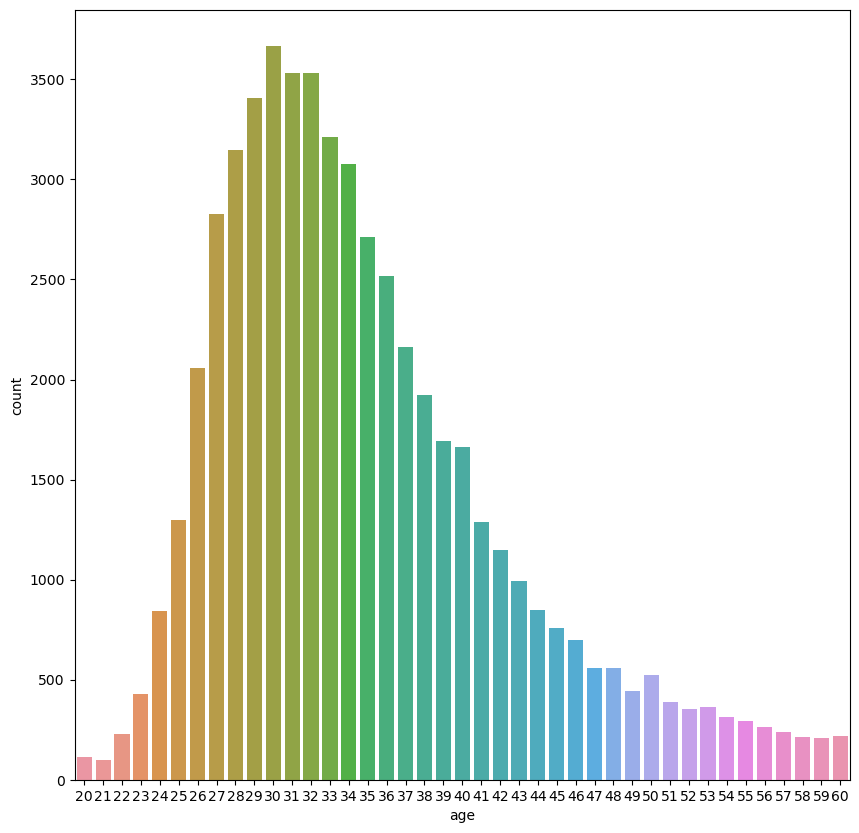

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(df.age)
plt.show()

# Previous Year Rating Distribution

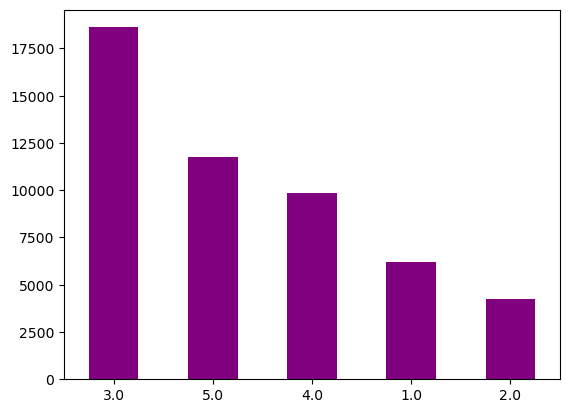

In [15]:
df['previous_year_rating'].value_counts().plot(kind='bar',color='purple')
plt.xticks(rotation=0)
plt.show()


# Most employees are rated as 3 on previous year rating

# No. of trainings

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


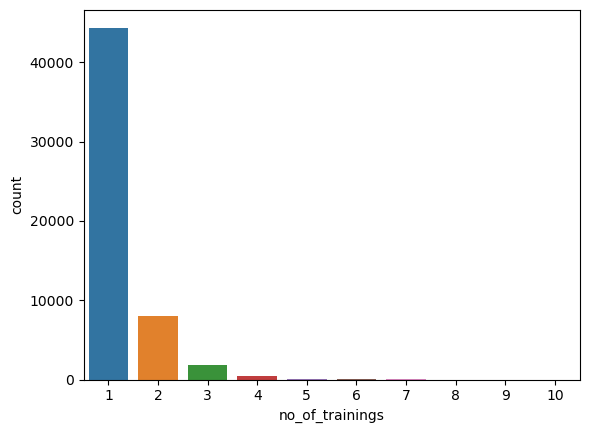

In [16]:
sns.countplot(df.no_of_trainings)
plt.show()

# Length of Service

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


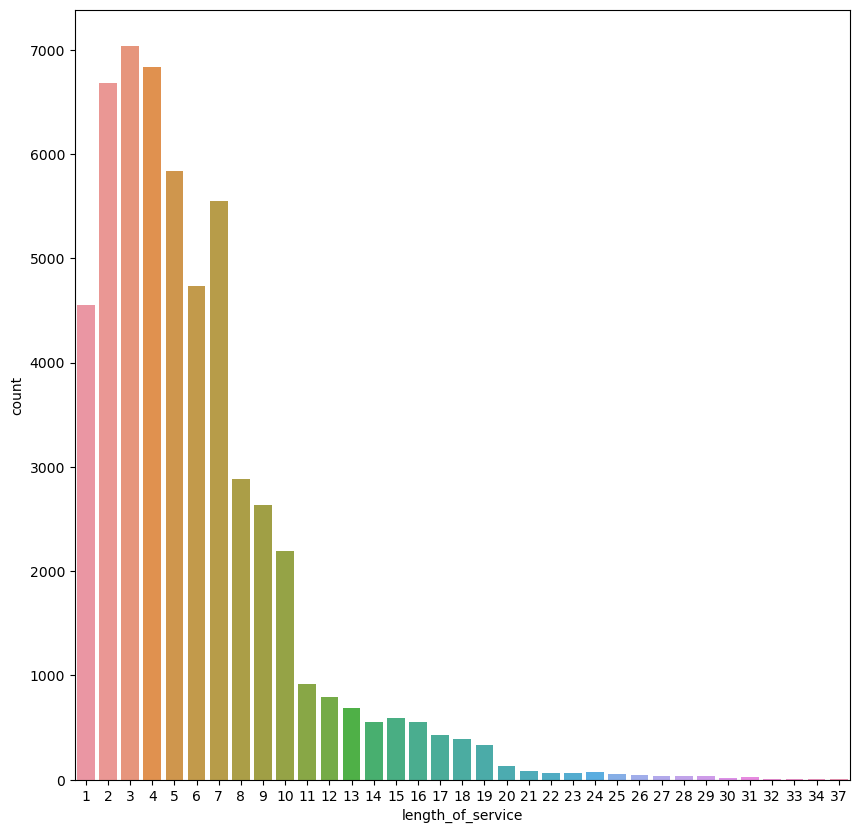

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(df.length_of_service)
plt.show()

# More number of employees are in their entry level and associate level positions

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


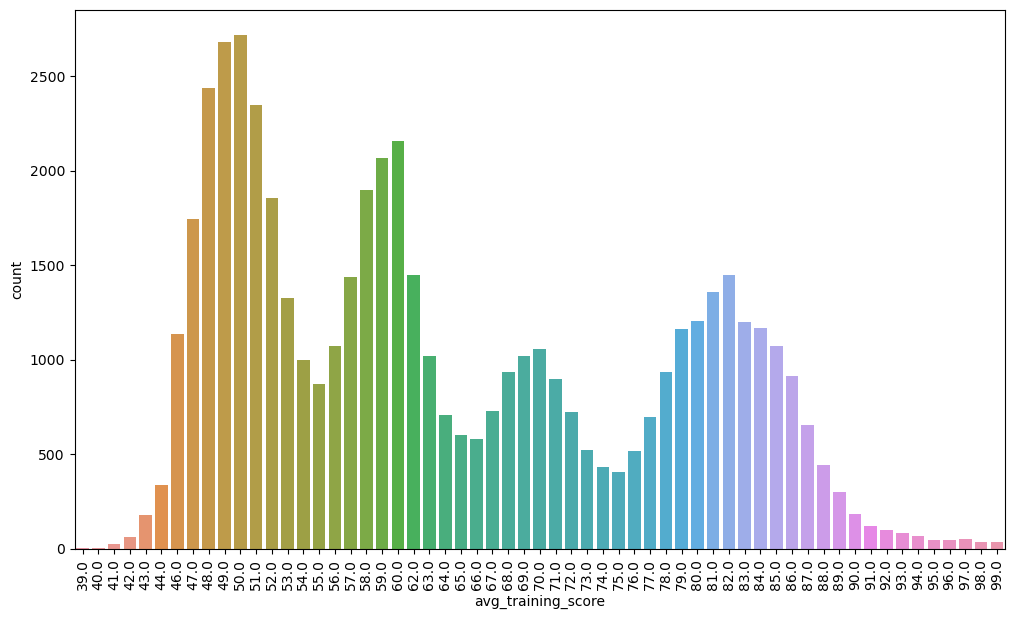

In [18]:
plt.figure(figsize=(12,7))
sns.countplot(df.avg_training_score)
plt.xticks(rotation=90)
plt.show()

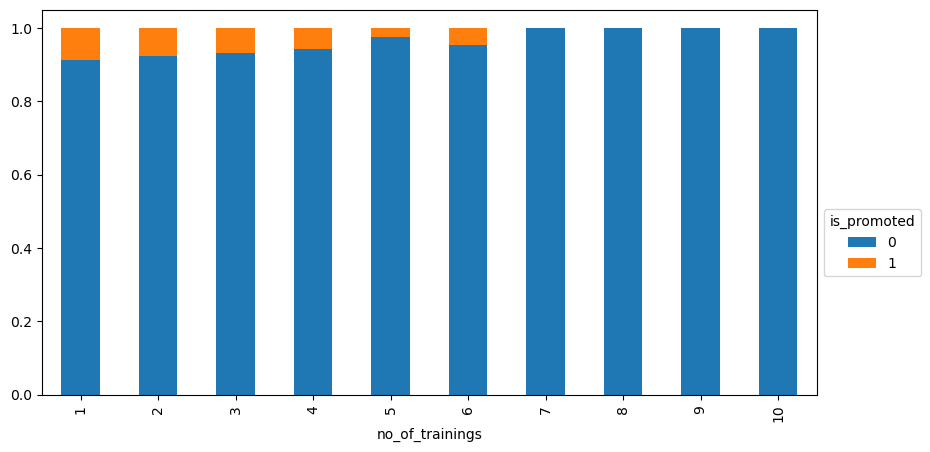

In [19]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(df.no_of_trainings,df.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

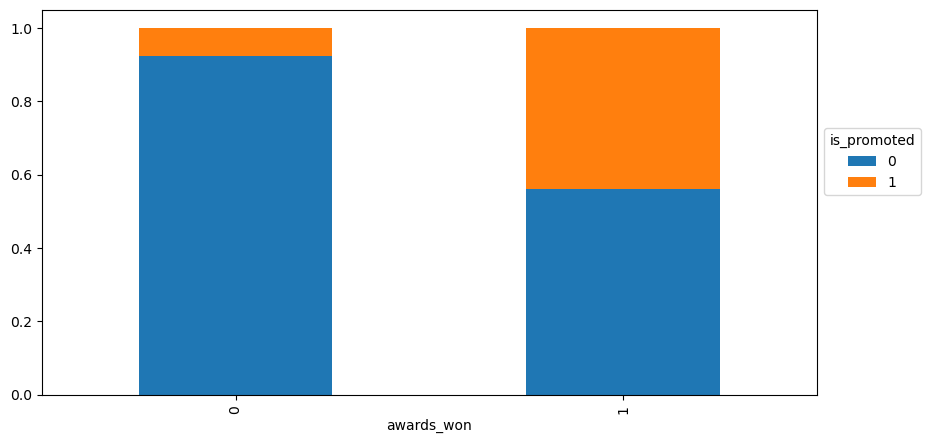

In [20]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(df.awards_won,df.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='lower left',bbox_to_anchor=(1, 0.5))

# Employees who have won awards have higher chances of getting promoted

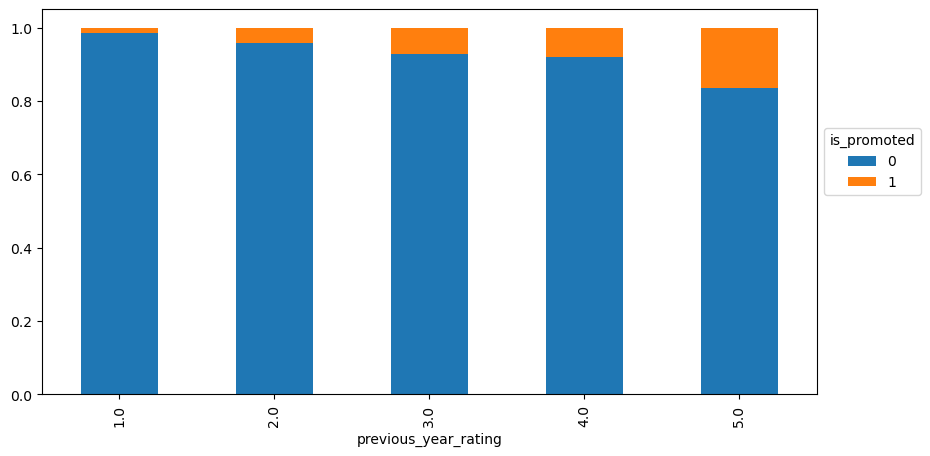

In [21]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(df.previous_year_rating,df.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='lower left',bbox_to_anchor=(1, 0.5))

# employee who have attained rating 5 on previous year, have a chances of getting promoted.

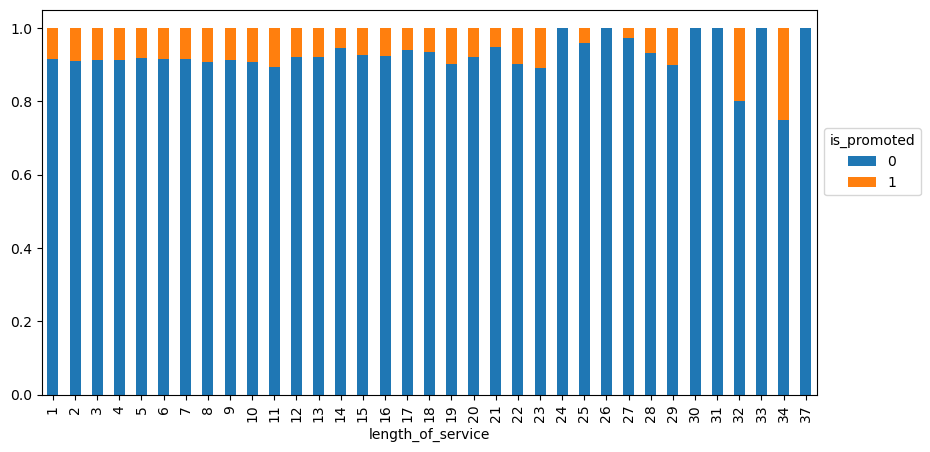

In [22]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(df.length_of_service,df.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='lower left',bbox_to_anchor=(1, 0.5))

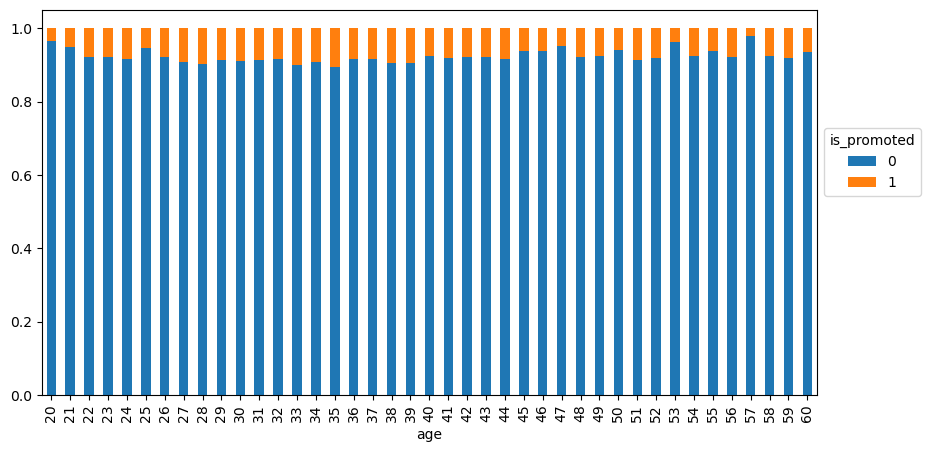

In [23]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(df.age,df.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='lower left',bbox_to_anchor=(1, 0.5))

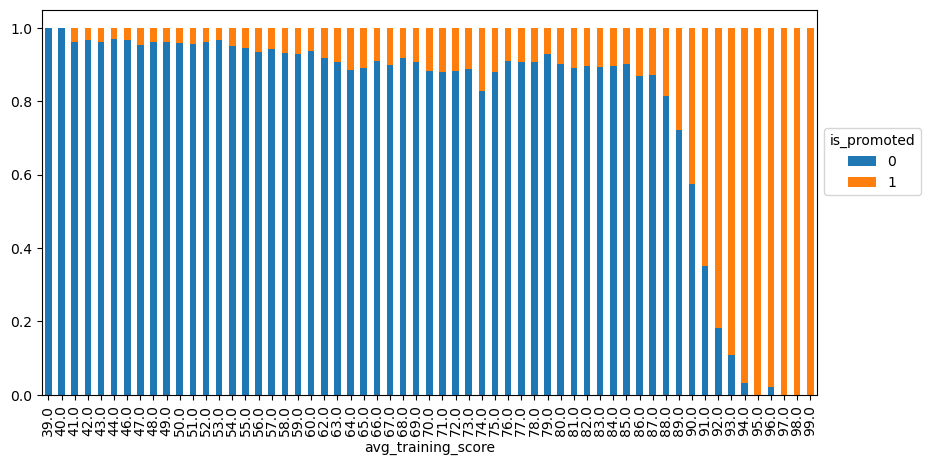

In [24]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(df.avg_training_score,df.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='lower left',bbox_to_anchor=(1, 0.5))

# When the average training score of the employee is above 90, they have a chance of promotion

# Data Preprocessing

In [25]:
le = LabelEncoder()

In [26]:
df['department'] = le.fit_transform(df['department'])
df['gender'] = le.fit_transform(df['gender'])
df['education'] = le.fit_transform(df['education'].astype(str))
df['recruitment_channel'] = le.fit_transform(df['recruitment_channel'])
df['region']=le.fit_transform(df['region'])

In [27]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,0,49.0,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,60.0,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,50.0,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,50.0,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,73.0,0


In [28]:
cols = [ 'previous_year_rating', 'avg_training_score']
for col in cols:
   df[col] = df[col].apply(lambda x: int(x) if x == x else 0)

In [29]:
df = df.drop('employee_id',axis=1)

In [30]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5,8,0,49,0
1,4,14,0,1,0,1,30,5,4,0,60,0
2,7,10,0,1,2,1,34,3,7,0,50,0
3,7,15,0,1,0,2,39,1,10,0,50,0
4,8,18,0,1,0,1,45,3,2,0,73,0


In [31]:
df['education'].value_counts()

0    36669
2    14925
3     2409
1      805
Name: education, dtype: int64

In [32]:
df.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

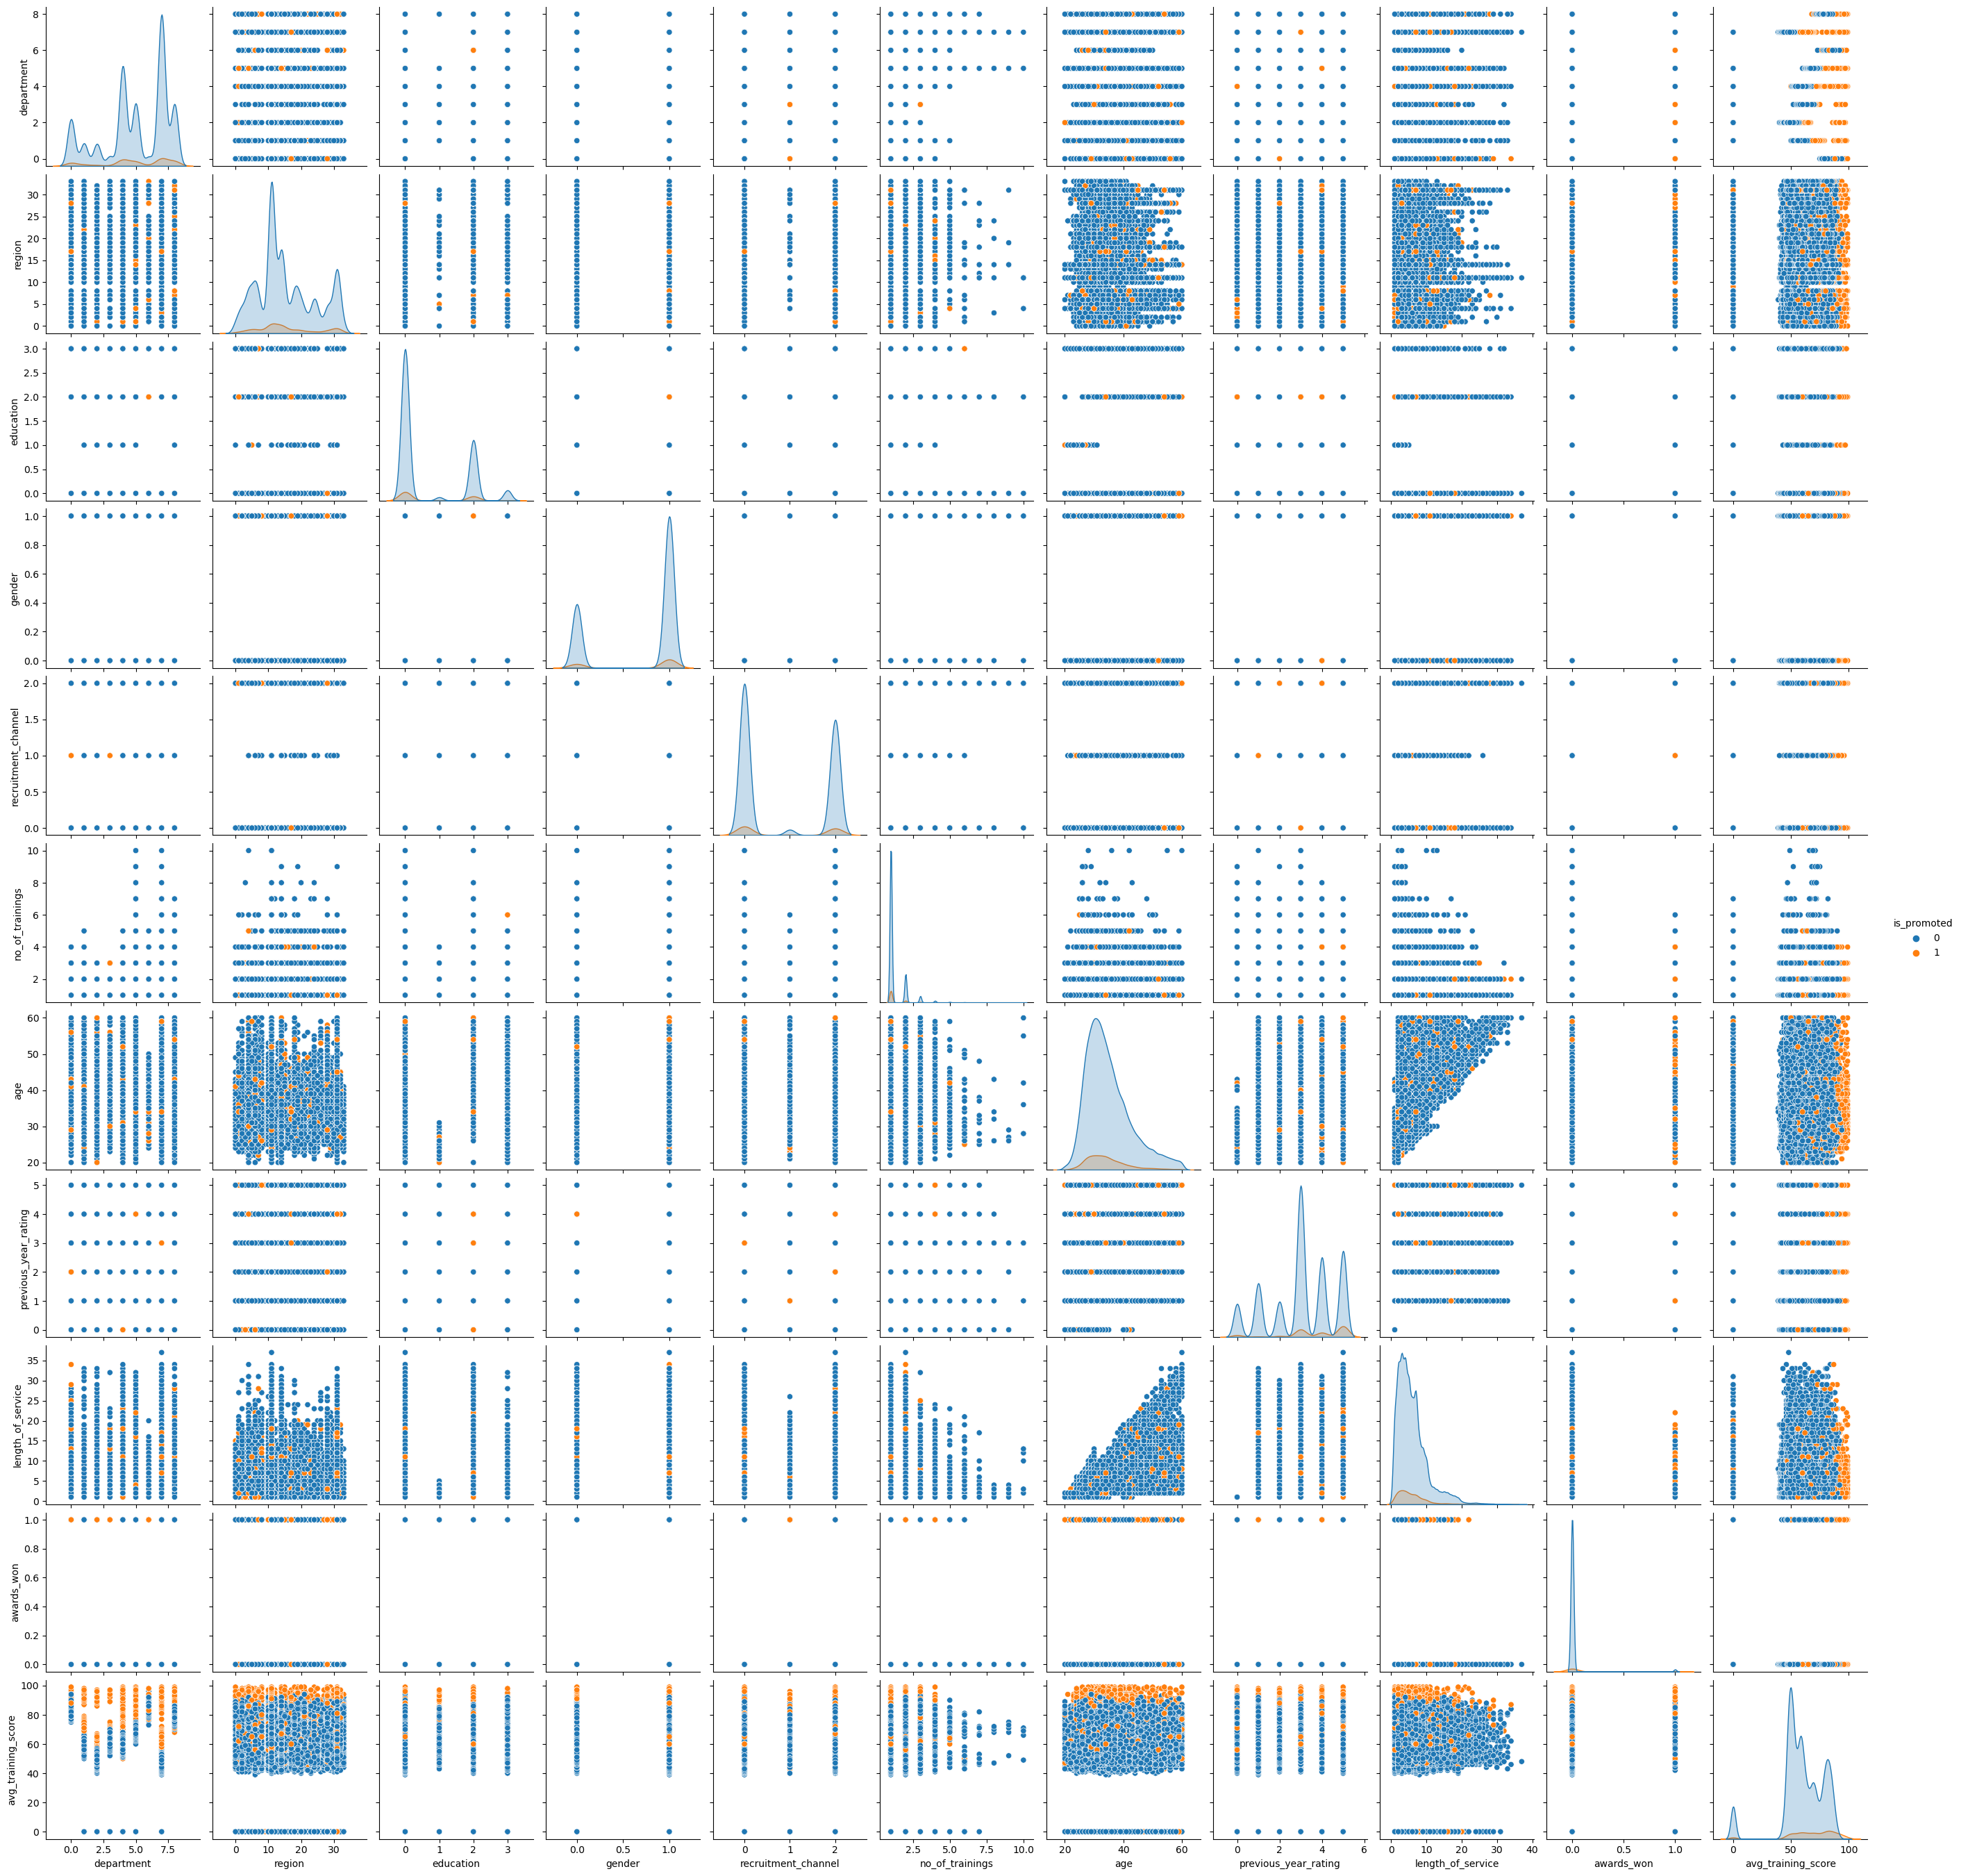

In [33]:
sns.pairplot(df,hue='is_promoted')

# HeatMap & Correlation Matrix

In [34]:
tc = df.corr()
tc

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
department,1.000000,-0.020592,0.068075,-0.030108,0.004732,0.014152,0.079162,-0.100340,0.059060,-0.002151,-0.129774,0.000130
region,-0.020592,1.000000,-0.006510,0.019730,-0.000920,-0.004590,-0.088918,-0.013465,-0.058939,0.000307,0.018564,0.008841
education,0.068075,-0.006510,1.000000,0.010125,-0.005973,-0.044336,0.233830,0.042179,0.161002,-0.001175,-0.002836,0.009608
gender,-0.030108,0.019730,0.010125,1.000000,0.006567,0.084501,-0.016293,-0.025053,-0.019675,0.002381,-0.004862,-0.011109
recruitment_channel,0.004732,-0.000920,-0.005973,0.006567,1.000000,-0.010405,-0.011400,0.003506,-0.002887,-0.005510,-0.002449,0.002229
no_of_trainings,0.014152,-0.004590,-0.044336,0.084501,-0.010405,1.000000,-0.081278,-0.064119,-0.057275,-0.007628,0.042634,-0.024896
age,0.079162,-0.088918,0.233830,-0.016293,-0.011400,-0.081278,1.000000,0.177935,0.657111,-0.008169,-0.041198,-0.017166
previous_year_rating,-0.100340,-0.013465,0.042179,-0.025053,0.003506,-0.064119,0.177935,1.000000,0.191163,0.021475,0.031689,0.125991
length_of_service,0.059060,-0.058939,0.161002,-0.019675,-0.002887,-0.057275,0.657111,0.191163,1.000000,-0.039927,-0.029505,-0.010670
awards_won,-0.002151,0.000307,-0.001175,0.002381,-0.005510,-0.007628,-0.008169,0.021475,-0.039927,1.000000,0.057622,0.195871


<AxesSubplot:>

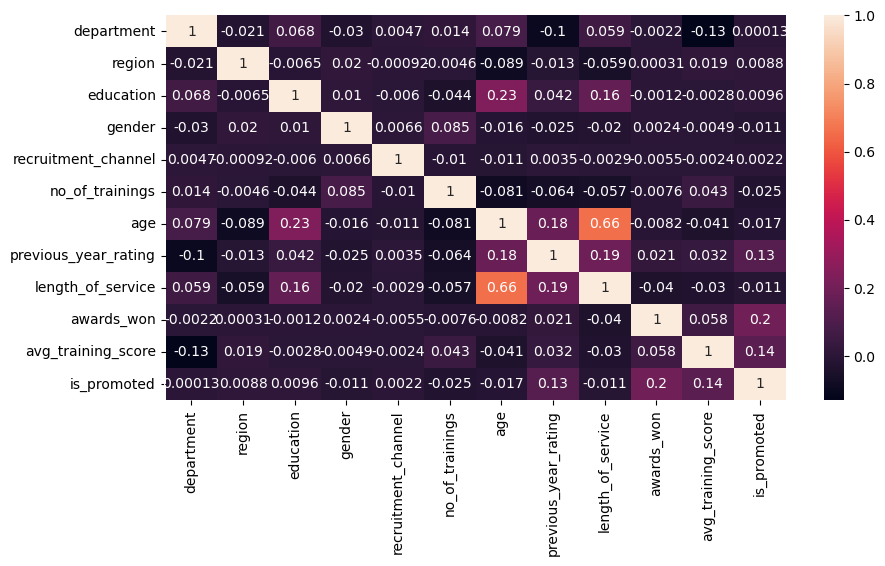

In [35]:
sns.heatmap(tc,annot=True)

# Building the model

In [36]:
df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [37]:
X = df[['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score']]
Y = df[['is_promoted']]

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [39]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(38365, 11)
(38365, 1)
(16443, 11)
(16443, 1)


# Logistic Regression

In [40]:
model = LogisticRegression(solver='liblinear')

In [41]:
model.fit(X_train,Y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [42]:
pred = model.predict(X_test)

In [43]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [44]:
print('The Accuracy score is ',(metrics.accuracy_score(Y_test,pred)*100),'%')

The Accuracy score is  91.94794137322873 %


In [45]:
print('The Precision score is ',(metrics.precision_score(Y_test,pred)*100),'%')
print('The F1 score is ',(metrics.f1_score(Y_test,pred)*100),'%')
print('The recall score is ',(metrics.recall_score(Y_test,pred)*100),'%')

The Precision score is  68.27586206896552 %
The F1 score is  13.009198423127463 %
The recall score is  7.18954248366013 %


# Bagging & Boosting

# Random forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
model_rf = RandomForestClassifier()

In [48]:
model_rf.fit(X_train,Y_train)

C:\Users\USER\AppData\Local\Temp\ipykernel_10692\2156950555.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train,Y_train)


RandomForestClassifier()

In [49]:
pred_rf = model_rf.predict(X_test)

In [50]:
print('The Accuracy score is ',(metrics.accuracy_score(Y_test,pred_rf)*100),'%')
print('The Precision score is ',(metrics.precision_score(Y_test,pred_rf)*100),'%')
print('The F1 score is ',(metrics.f1_score(Y_test,pred_rf)*100),'%')
print('The recall score is ',(metrics.recall_score(Y_test,pred_rf)*100),'%')

The Accuracy score is  93.51699811469926 %
The Precision score is  84.63251670378618 %
The F1 score is  41.6210295728368 %
The recall score is  27.596223674655047 %


In [51]:
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Bagging Classifier

In [54]:
model_bc = BaggingClassifier()


In [55]:
model_bc.fit(X_train,Y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier()

In [56]:
pred_bc = model_bc.predict(X_test)


In [57]:
print('The Accuracy score is ',(metrics.accuracy_score(Y_test,pred_bc)*100),'%')
print('The Precision score is ',(metrics.precision_score(Y_test,pred_bc)*100),'%')
print('The F1 score is ',(metrics.f1_score(Y_test,pred_bc)*100),'%')
print('The recall score is ',(metrics.recall_score(Y_test,pred_bc)*100),'%')

The Accuracy score is  93.2858967341726 %
The Precision score is  71.16279069767441 %
The F1 score is  45.40059347181009 %
The recall score is  33.33333333333333 %


# AdaBoost Classifier

In [58]:
model_ab = AdaBoostClassifier()

In [59]:
model_ab.fit(X_train,Y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [60]:
pred_ab = model_ab.predict(X_test)

In [61]:
print('The Accuracy score is ',(metrics.accuracy_score(Y_test,pred_ab)*100),'%')
print('The Precision score is ',(metrics.precision_score(Y_test,pred_ab)*100),'%')
print('The F1 score is ',(metrics.f1_score(Y_test,pred_ab)*100),'%')
print('The recall score is ',(metrics.recall_score(Y_test,pred_ab)*100),'%')

The Accuracy score is  92.61083743842364 %
The Precision score is  79.77941176470588 %
The F1 score is  26.318981200727716 %
The recall score is  15.758896151053015 %


# Xgboosting

In [62]:
model_xg = XGBClassifier()

In [63]:
model_xg.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [64]:
pred_xg = model_xg.predict(X_test)

In [65]:
print('The Accuracy score is ',(metrics.accuracy_score(Y_test,pred_xg)*100),'%')
print('The Precision score is ',(metrics.precision_score(Y_test,pred_xg)*100),'%')
print('The F1 score is ',(metrics.f1_score(Y_test,pred_xg)*100),'%')
print('The recall score is ',(metrics.recall_score(Y_test,pred_xg)*100),'%')

The Accuracy score is  94.17989417989418 %
The Precision score is  88.60294117647058 %
The F1 score is  50.18219677251431 %
The recall score is  35.003631082062455 %


# Gradient Boosting Classifier

In [66]:
model_gb = GradientBoostingClassifier()


In [67]:
model_gb.fit(X_train,Y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [68]:
pred_gb = model_gb.predict(X_test)

In [69]:
print('The Accuracy score is ',(metrics.accuracy_score(Y_test,pred_gb)*1l00),'%')
print('The Precision score is ',(metrics.precision_score(Y_test,pred_gb)*100),'%')
print('The F1 score is ',(metrics.f1_score(Y_test,pred_gb)*100),'%')
print('The recall score is ',(metrics.recall_score(Y_test,pred_gb)*100),'%')


The Accuracy score is  93.85148695493523 %
The Precision score is  90.66666666666666 %
The F1 score is  44.663382594417065 %
The recall score is  29.629629629629626 %


# XGBoost Classifier gives accuarcy score of 93.99%